<a href="https://colab.research.google.com/github/Parimala-15/House-Price-Prediction/blob/main/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# House Prices Prediction using TensorFlow Decision Forests

# 🏠 House Price Prediction using Machine Learning

### 📌 Overview:
This project aims to predict house prices for residential properties in Ames, Iowa using advanced regression techniques. The dataset is provided by Kaggle as part of the "House Prices: Advanced Regression Techniques" competition.

### 🔍 Problem Statement:
Build a predictive model that can accurately estimate the final sale price of homes based on various features such as overall quality, square footage, neighborhood, year built, and more.

### 📊 Dataset:
- **Source**: [Kaggle Competition Link](https://www.kaggle.com/c/house-prices-advanced-regression-techniques)
- **Training Set**: 1460 entries with 81 features
- **Test Set**: 1459 entries without `SalePrice`

### 🧠 Techniques Used:
- Exploratory Data Analysis (EDA)
- Data Cleaning and Preprocessing
- Feature Importance Analysis
- Random Forest Regression using TensorFlow Decision Forests (TF-DF)

### 📈 Model Evaluation:
- RMSE on training set: *your value here*
- Kaggle Public Leaderboard Score: *your score here (if submitted)*

### 📁 Files:
- `House_Price_Prediction.ipynb` - Main notebook
- `submission.csv` - Final predictions for test data

### 🛠 Tools & Libraries:
- Python, Pandas, NumPy, Matplotlib, Seaborn
- TensorFlow Decision Forests (TF-DF)

---



Data fields
Here's a brief version of what you'll find in the data description file.

SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.

MSSubClass: The building class

MSZoning: The general zoning classification

LotFrontage: Linear feet of street connected to property

LotArea: Lot size in square feet

Street: Type of road access

Alley: Type of alley access

LotShape: General shape of property

LandContour: Flatness of the property

Utilities: Type of utilities available

LotConfig: Lot configuration

LandSlope: Slope of property

Neighborhood: Physical locations within Ames city limits

Condition1: Proximity to main road or railroad

Condition2: Proximity to main road or railroad (if a second is present)

BldgType: Type of dwelling

HouseStyle: Style of dwelling

OverallQual: Overall material and finish quality

OverallCond: Overall condition rating

YearBuilt: Original construction date

YearRemodAdd: Remodel date

RoofStyle: Type of roof

RoofMatl: Roof material

Exterior1st: Exterior covering on house

Exterior2nd: Exterior covering on house (if more than one material)

MasVnrType: Masonry veneer type

MasVnrArea: Masonry veneer area in square feet

ExterQual: Exterior material quality

ExterCond: Present condition of the material on the exterior

Foundation: Type of foundation

BsmtQual: Height of the basement

BsmtCond: General condition of the basement

BsmtExposure: Walkout or garden level basement walls

BsmtFinType1: Quality of basement finished area

BsmtFinSF1: Type 1 finished square feet

BsmtFinType2: Quality of second finished area (if present)

BsmtFinSF2: Type 2 finished square feet

BsmtUnfSF: Unfinished square feet of basement area

TotalBsmtSF: Total square feet of basement area

Heating: Type of heating

HeatingQC: Heating quality and condition

CentralAir: Central air conditioning

Electrical: Electrical system

1stFlrSF: First Floor square feet

2ndFlrSF: Second floor square feet

LowQualFinSF: Low quality finished square feet (all floors)

GrLivArea: Above grade (ground) living area square feet

BsmtFullBath: Basement full bathrooms

BsmtHalfBath: Basement half bathrooms

FullBath: Full bathrooms above grade

HalfBath: Half baths above grade

Bedroom: Number of bedrooms above basement level

Kitchen: Number of kitchens

KitchenQual: Kitchen quality

TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

Functional: Home functionality rating

Fireplaces: Number of fireplaces

FireplaceQu: Fireplace quality

GarageType: Garage location

GarageYrBlt: Year garage was built

GarageFinish: Interior finish of the garage

GarageCars: Size of garage in car capacity

GarageArea: Size of garage in square feet

GarageQual: Garage quality

GarageCond: Garage condition

PavedDrive: Paved driveway

WoodDeckSF: Wood deck area in square feet

OpenPorchSF: Open porch area in square feet

EnclosedPorch: Enclosed porch area in square feet

3SsnPorch: Three season porch area in square feet

ScreenPorch: Screen porch area in square feet

PoolArea: Pool area in square feet

PoolQC: Pool quality

Fence: Fence quality

MiscFeature: Miscellaneous feature not covered in other categories

MiscVal: $Value of miscellaneous feature

MoSold: Month Sold

YrSold: Year Sold

SaleType: Type of sale

SaleCondition: Condition of sale

Decision Forests are a family of tree-based models including Random Forests and Gradient Boosted Trees. They are the best place to start when working with tabular data, and will often outperform (or provide a strong baseline) before you begin experimenting with neural networks.

In [1]:
#Import the library
import tensorflow as tf
import tensorflow_decision_forests as tfdf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
print("Tensorflow v" + tf.__version__)
print("Tensorflow Decision Forests v" + tfdf.__version__)

Tensorflow v2.18.0
Tensorflow Decision Forests v1.11.0


In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
#Load the dataset
train_df = ('/content/drive/MyDrive/ ML Internship/House-Price/train.csv')
dataset_df = pd.read_csv(train_df)
print("Full train dataset shape is {}".format(dataset_df.shape))


Full train dataset shape is (1460, 81)


The data is composed of 81 columns and 1460 entries. We can see all 81 dimensions of our dataset by printing out the first 3 entries using the following code:

In [5]:
dataset_df.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


There are 79 feature columns. Using these features your model has to predict the house sale price indicated by the label column named SalePrice.

We will drop the Id column as it is not necessary for model training.

In [6]:
dataset_df = dataset_df.drop(columns=['Id'])
dataset_df.head(3)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


We can inspect the types of feature columns using the following code:

In [7]:
dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

# House Price Distribution

Now let us take a look at how the house prices are distributed.

In [8]:
print(dataset_df['SalePrice'].describe())


count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


/tmp/ipython-input-9-2644648630.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset_df['SalePrice'], color='b', bins=100, hist_kws={'alpha': 0.4});


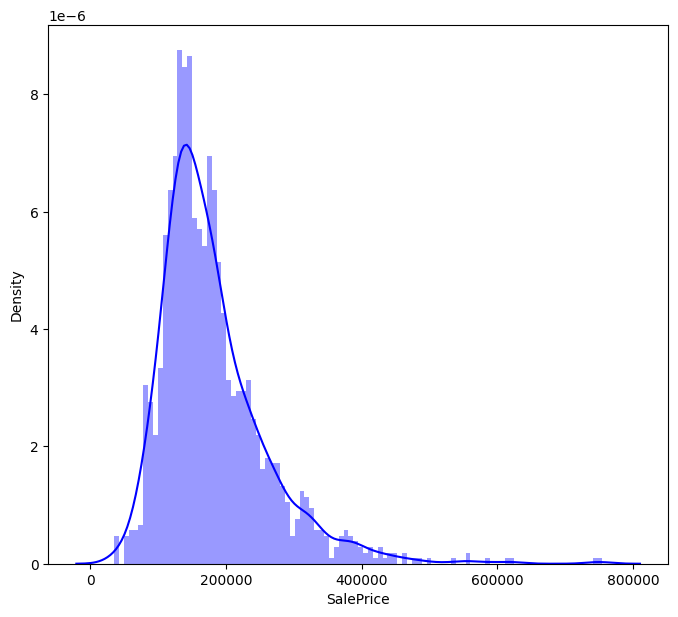

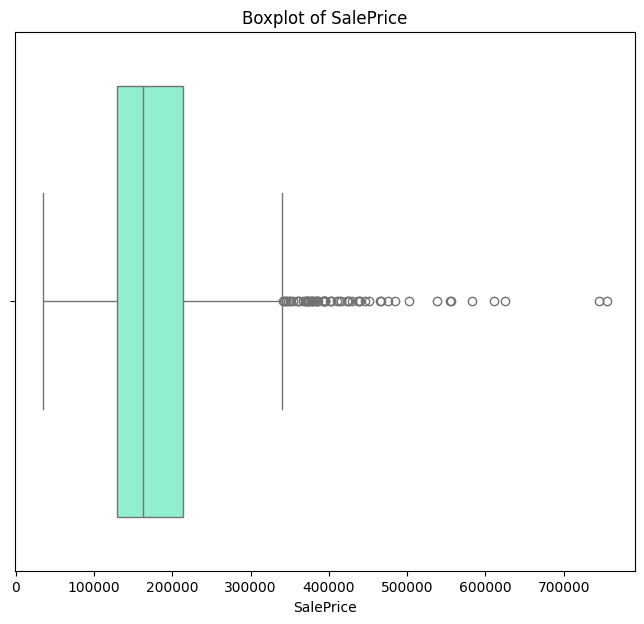

In [9]:
plt.figure(figsize=(8, 7))
sns.distplot(dataset_df['SalePrice'], color='b', bins=100, hist_kws={'alpha': 0.4});
plt.show()

#The general shape of SalePrice distribution (skewed, normal, multimodal).
#If the data is skewed right (typical in housing prices), it may suggest log transformation.

plt.figure(figsize=(8, 7))
sns.boxplot(x=dataset_df['SalePrice'], color='aquamarine')
plt.title('Boxplot of SalePrice')
plt.show()

#The price spread and central tendency.
#How extreme some house prices are compared to the bulk.
#Whether your dataset contains high-end homes that might skew analysis or need special handling.


In [10]:
import matplotlib
print(matplotlib.colors.CSS4_COLORS.keys())


dict_keys(['aliceblue', 'antiquewhite', 'aqua', 'aquamarine', 'azure', 'beige', 'bisque', 'black', 'blanchedalmond', 'blue', 'blueviolet', 'brown', 'burlywood', 'cadetblue', 'chartreuse', 'chocolate', 'coral', 'cornflowerblue', 'cornsilk', 'crimson', 'cyan', 'darkblue', 'darkcyan', 'darkgoldenrod', 'darkgray', 'darkgreen', 'darkgrey', 'darkkhaki', 'darkmagenta', 'darkolivegreen', 'darkorange', 'darkorchid', 'darkred', 'darksalmon', 'darkseagreen', 'darkslateblue', 'darkslategray', 'darkslategrey', 'darkturquoise', 'darkviolet', 'deeppink', 'deepskyblue', 'dimgray', 'dimgrey', 'dodgerblue', 'firebrick', 'floralwhite', 'forestgreen', 'fuchsia', 'gainsboro', 'ghostwhite', 'gold', 'goldenrod', 'gray', 'green', 'greenyellow', 'grey', 'honeydew', 'hotpink', 'indianred', 'indigo', 'ivory', 'khaki', 'lavender', 'lavenderblush', 'lawngreen', 'lemonchiffon', 'lightblue', 'lightcoral', 'lightcyan', 'lightgoldenrodyellow', 'lightgray', 'lightgreen', 'lightgrey', 'lightpink', 'lightsalmon', 'lights

In [11]:
import scipy.stats as stats

This plot compares the quantiles of your actual data (SalePrice) to the quantiles of a perfect normal distribution.

If your data follows a normal distribution, the points will align closely along the diagonal line.

Deviations (curving, tilting) signal skewness or heavy tails.

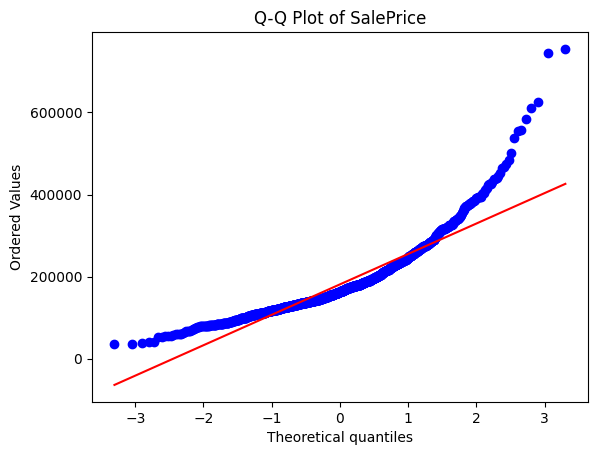

In [12]:
stats.probplot(dataset_df['SalePrice'], dist="norm", plot=plt)
plt.title('Q-Q Plot of SalePrice')
plt.show()



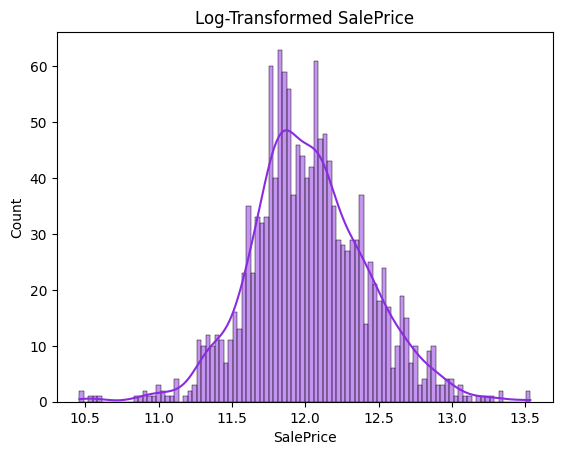

In [13]:
log_prices = np.log1p(dataset_df['SalePrice'])
sns.histplot(log_prices,color='blueviolet', bins=100, kde=True)
plt.title('Log-Transformed SalePrice')
plt.show()

np.log1p() takes the log of (SalePrice + 1), which stabilizes variance and reduces skewness—especially important in right-skewed data like housing prices.

The histogram shows the new, transformed shape with a KDE curve to smooth it visually.

In [14]:
print("Skewness:", dataset_df['SalePrice'].skew())
print("Kurtosis:", dataset_df['SalePrice'].kurt())


Skewness: 1.8828757597682129
Kurtosis: 6.536281860064529


Skewness tells you how asymmetric your data is.

Kurtosis shows if the tails are heavy (i.e. outlier-prone).

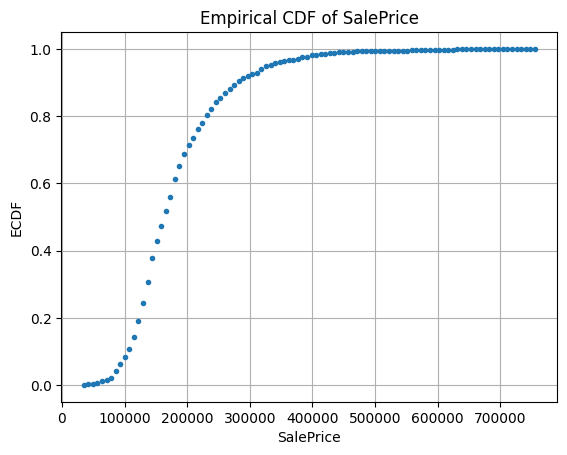

In [15]:
import statsmodels.api as sm

ecdf = sm.distributions.ECDF(dataset_df['SalePrice'])
x = np.linspace(min(dataset_df['SalePrice']), max(dataset_df['SalePrice']), num=100)
y = ecdf(x)

plt.plot(x, y, marker='.', linestyle='none')
plt.title('Empirical CDF of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('ECDF')
plt.grid()
plt.show()


Empirical Cumulative Distribution Function (ECDF) plot tells you:
the proportion of data points less than or equal to a given value on the x-axis.

It's built from actual data (not a theoretical distribution), so it's excellent for identifying percentile positions and understanding the cumulative behavior of SalePrice.

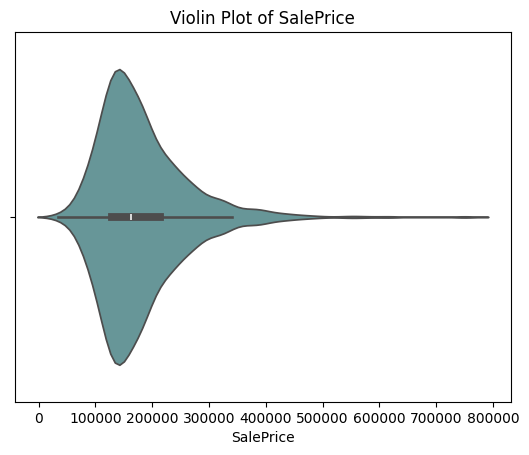

In [16]:
sns.violinplot(x=dataset_df['SalePrice'], color='cadetblue')
plt.title('Violin Plot of SalePrice')
plt.show()


the proportion of data points less than or equal to a given value on the x-axis.

It's built from actual data (not a theoretical distribution), so it's excellent for identifying percentile positions and understanding the cumulative behavior of SalePrice.

# Numerical data distribution

We will now take a look at how the numerical features are distributed. In order to do this, let us first list all the types of data from our dataset and select only the numerical ones.

In [17]:
list(set(dataset_df.dtypes.tolist()))

[dtype('int64'), dtype('float64'), dtype('O')]

In [18]:
df_num = dataset_df.select_dtypes(include=['float64', 'int64'])
df_num.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


Now let us plot the distribution for all the numerical features.

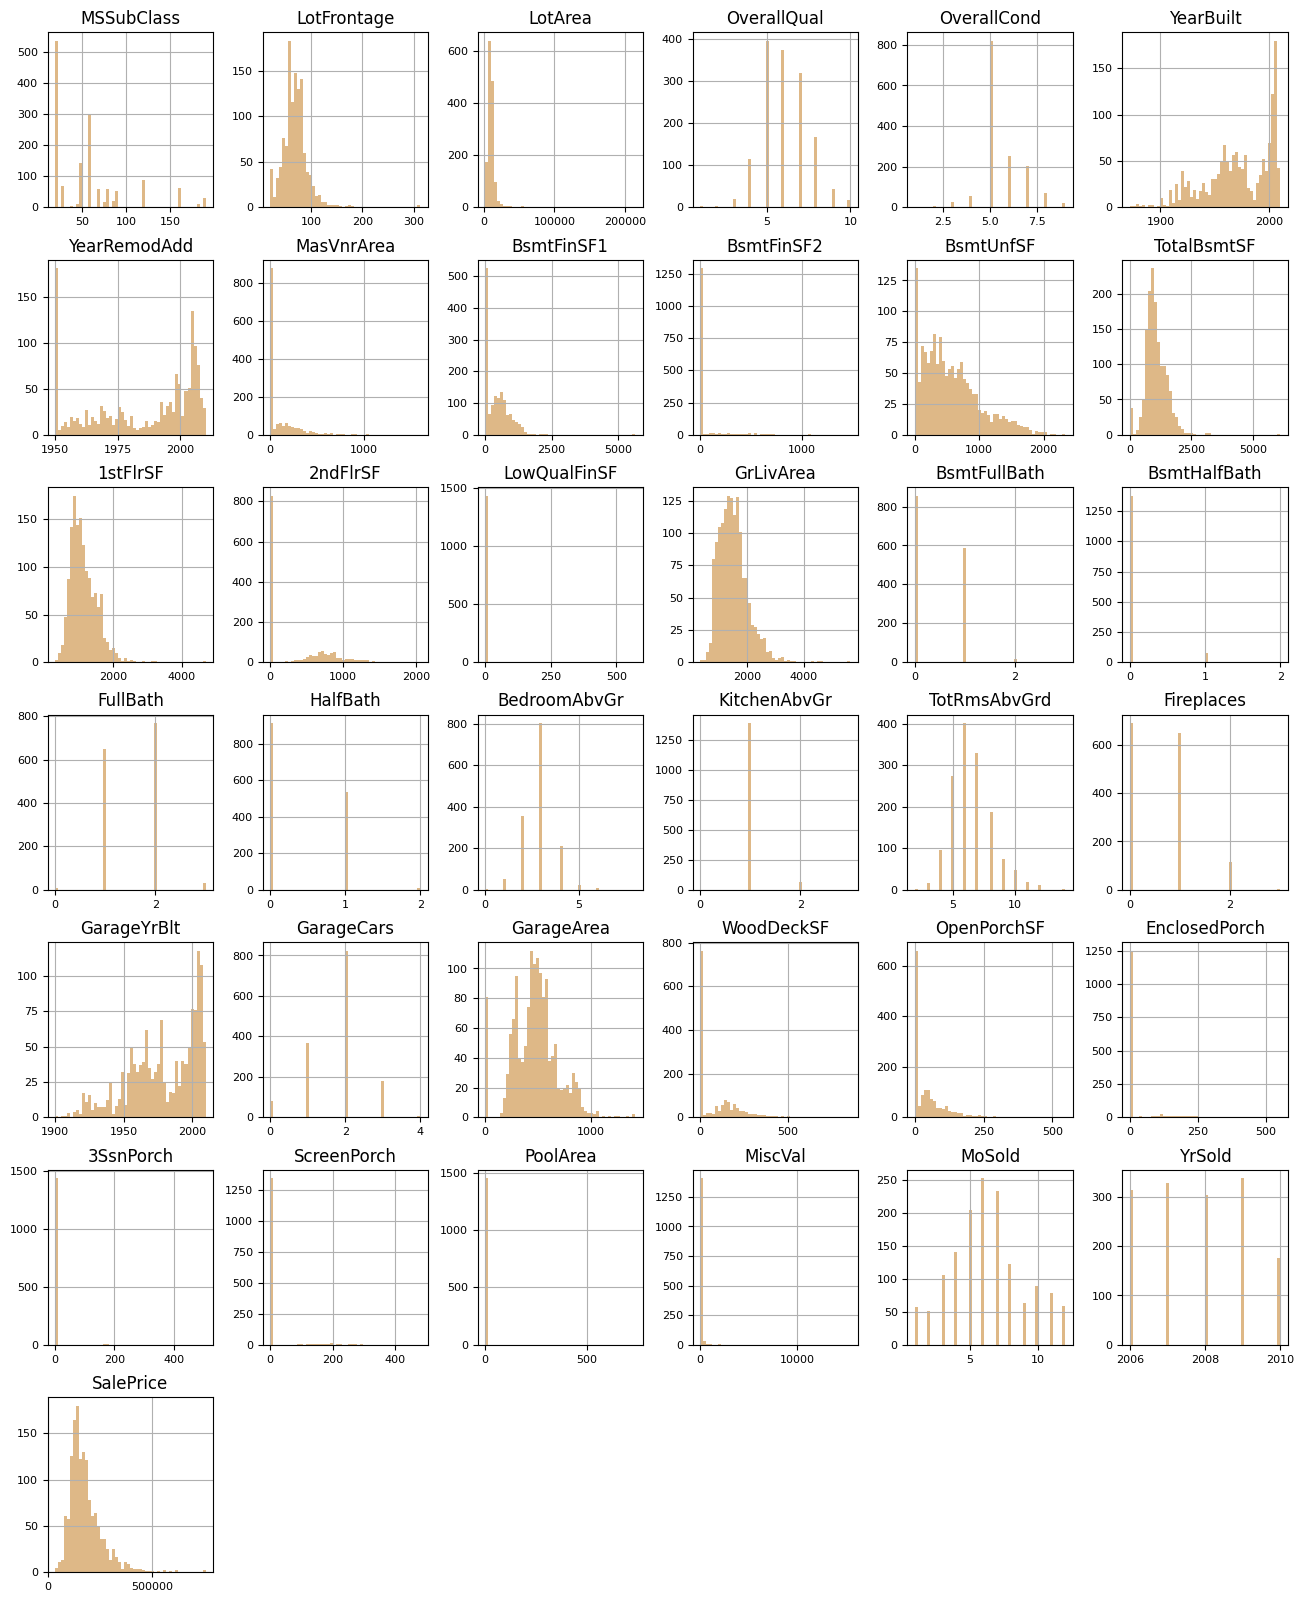

In [19]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8, color='burlywood');

# Prepare the dataset

This dataset contains a mix of numeric, categorical and missing features. TF-DF supports all these feature types natively, and no preprocessing is required. This is one advantage of tree-based models, making them a great entry point to Tensorflow and ML.

In [20]:
#Now let us split the dataset into training and testing datasets:
def split_dataset(dataset, test_ratio=0.30):
  test_indices = np.random.rand(len(dataset)) < test_ratio
  return dataset[~test_indices], dataset[test_indices]

train_ds_pd, test_ds_pd = split_dataset(dataset_df)

print("{} examples in training, {} examples for testing.".format(
      len(train_ds_pd), len(test_ds_pd)))


987 examples in training, 473 examples for testing.


There's one more step required before we can train the model. We need to convert the datatset from Pandas format (pd.DataFrame) into TensorFlow Datasets format (tf.data.Dataset).


TensorFlow Datasets is a high performance data loading library which is helpful when training neural networks with accelerators like GPUs and TPUs.


By default the Random Forest Model is configured to train classification tasks. Since this is a regression problem, we will specify the type of the task (tfdf.keras.Task.REGRESSION) as a parameter here.

In [21]:
label = 'SalePrice'
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_ds_pd, label=label, task=tfdf.keras.Task.REGRESSION)
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(test_ds_pd, label=label, task=tfdf.keras.Task.REGRESSION)

# Select a Model

There are several tree-based models for you to choose from.

- RandomForestModel
- GradientBoostedTreesModel
- CartModel
- DistributedGradientBoostedTreesModel

To start, we'll work with a Random Forest.

This is the most well-known of the Decision Forest training algorithms.

A Random Forest is a collection of decision trees, each trained independently on a random subset of the training dataset (sampled with replacement).

The algorithm is unique in that it is robust to overfitting, and easy to use.

In [22]:
#We can list the all the available models in TensorFlow Decision Forests using the following code:
tfdf.keras.get_all_models()

[tensorflow_decision_forests.keras.RandomForestModel,
 tensorflow_decision_forests.keras.GradientBoostedTreesModel,
 tensorflow_decision_forests.keras.CartModel,
 tensorflow_decision_forests.keras.DistributedGradientBoostedTreesModel]

# How can I configure them?

TensorFlow Decision Forests provides good defaults for you (e.g. the top ranking hyperparameters on our benchmarks, slightly modified to run in reasonable time).

If you would like to configure the learning algorithm, you will find many options you can explore to get the highest possible accuracy.

You can select a template and/or set parameters as follows:

rf = tfdf.keras.RandomForestModel(hyperparameter_template="benchmark_rank1", task=tfdf.keras.Task.REGRESSION)

# Create a Random Forest

Today, we will use the defaults to create the Random Forest Model while specifiyng the task type as tfdf.keras.Task.REGRESSION.

In [23]:
rf=tfdf.keras.RandomForestModel(task=tfdf.keras.Task.REGRESSION)
rf.compile(metrics=["mse"])

Use /tmp/tmpncwzbygt as temporary training directory


# Train the model

We will train the model using a one-liner.

In [ ]:
rf.fit(x=train_ds)

Reading training dataset...


# Visualize the model

One benefit of tree-based models is that you can easily visualize them. The default number of trees used in the Random Forests is 300. We can select a tree to display below.

In [ ]:
tfdf.model_plotter.plot_model_in_colab(rf, tree_idx=0, max_depth=3)

Evaluate the model on the Out of bag (OOB) data and the validation dataset
Before training the dataset we have manually seperated 20% of the dataset for validation named as valid_ds.


We can also use Out of bag (OOB) score to validate our RandomForestModel. To train a Random Forest Model, a set of random samples from training set are choosen by the algorithm and the rest of the samples are used to finetune the model.The subset of data that is not chosen is known as Out of bag data (OOB). OOB score is computed on the OOB data.

The training logs show the Root Mean Squared Error (RMSE) evaluated on the out-of-bag dataset according to the number of trees in the model. Let us plot this

In [ ]:
logs = rf.make_inspector().training_logs()
plt.plot([log.num_trees for log in logs], [log.evaluation.rmse for log in logs],color= 'darkgoldenrod')
plt.xlabel('Number of trees')
plt.ylabel('RMSE (out-of-bag)')
plt.show

In [ ]:
# Get the final out-of-bag RMSE from training logs
final_rmse = logs[-1].evaluation.rmse
print("✅ Final RMSE (Out-of-Bag):", final_rmse)


In [ ]:
#We can also see some general stats on the OOB dataset:
inspector = rf.make_inspector()
inspector.evaluation()

In [ ]:
#Now, let us run an evaluation using the validation dataset.

evaluation = rf.evaluate(test_ds, return_dict=True)
for name, value in evaluation.items():
  print(f"{name}: {value:.4f}")

# **Variable importances**
Variable importances generally indicate how much a feature contributes to the model predictions or quality. There are several ways to identify important features using TensorFlow Decision Forests.


In [ ]:
# Let us list the available Variable Importances for Decision Trees:

print("Available variable importances:")
for importance in inspector.variable_importances().keys():
  print("\t", importance)

As an example, let us display the important features for the Variable Importance NUM_AS_ROOT.

The larger the importance score for NUM_AS_ROOT, the more impact it has on the outcome of the model.

By default, the list is sorted from the most important to the least. From the output you can infer that the feature at the top of the list is used as the root node in most number of trees in the random forest than any other feature.

In [ ]:
inspector.variable_importances()["NUM_AS_ROOT"]

Plot the variable importances from the inspector using Matplotlib

In [ ]:
plt.figure(figsize=(12, 4))

variable_importance_metric = "NUM_AS_ROOT"
variable_importances = inspector.variable_importances()[variable_importance_metric]

feature_names = [vi[0].name for vi in variable_importances]
feature_importances = [vi[1] for vi in variable_importances]

feature_ranks = range(len(feature_names))

bar = plt.barh(feature_ranks, feature_importances, label=[str(x) for x in feature_ranks], color='darkolivegreen')
plt.yticks(feature_ranks, feature_names)
plt.gca().invert_yaxis()

for importance, patch in zip(feature_importances, bar.patches):
    plt.text(patch.get_x() +  patch.get_width(), patch.get_y(), f"{importance:.4f}", va="top")

plt.xlabel("Variable_importance_metric")
plt.title("NUM AS ROOT of the  class 1 vs the others")
plt.tight_layout()
plt.show()

In [ ]:
test_file_path = "/content/drive/MyDrive/ ML Internship/House-Price/test.csv"
test_data = pd.read_csv(test_file_path)
ids =  test_data.pop('Id')

test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(test_data, task=tfdf.keras.Task.REGRESSION)

preds = rf.predict(test_ds)
output = pd.DataFrame({'Id': ids, 'SalePrice': preds.squeeze()})

output.head()

In [ ]:
sample_submission_df = pd.read_csv('/content/drive/MyDrive/ ML Internship/House-Price/sample_submission.csv')
predictions = rf.predict(test_ds)
sample_submission_df['SalePrice'] = predictions.squeeze()

submission = pd.DataFrame({'Id': ids, 'SalePrice': predictions.squeeze()})
submission.to_csv('submission.csv', index=False)

sample_submission_df.head()

## ✅ Final Observations:

- The model identified important features such as OverallQual, GrLivArea, and TotalBsmtSF.
- Feature importance was visualized using TF-DF tools.
- Final submission generated with predictions for Kaggle evaluation.
